In [50]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=1)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
Gender_data=pd.read_csv('gender_classification_v7.csv')

In [52]:
print(Gender_data)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_l

In [53]:
Gender_data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [54]:
Gender_data.info()
Gender_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

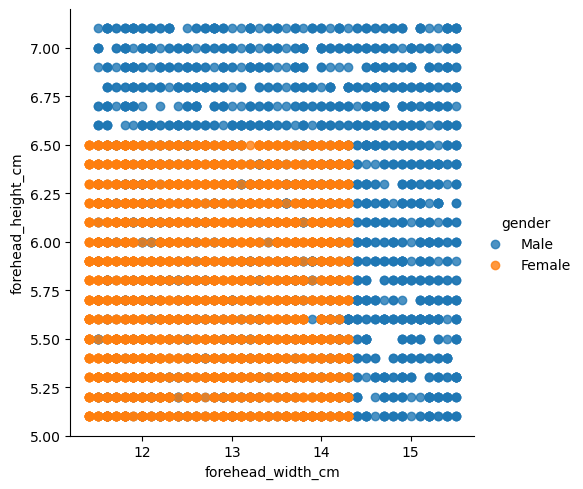

In [55]:
sns.lmplot( x='forehead_width_cm', y='forehead_height_cm', data=Gender_data, hue='gender', fit_reg=False,)

In [56]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
Gender_data["gender_code"] = ord_enc.fit_transform(Gender_data[["gender"]])
Gender_data.head()
Gender_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_code
0,1,11.8,6.1,1,0,1,1,Male,1.0
1,0,14.0,5.4,0,0,1,0,Female,0.0
2,0,11.8,6.3,1,1,1,1,Male,1.0
3,0,14.4,6.1,0,1,1,1,Male,1.0
4,1,13.5,5.9,0,0,0,0,Female,0.0
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,0.0
4997,1,11.9,5.4,0,0,0,0,Female,0.0
4998,1,12.9,5.7,0,0,0,0,Female,0.0
4999,1,13.2,6.2,0,0,0,0,Female,0.0


In [57]:
X=Gender_data.drop(columns= ['gender', 'gender_code'])
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [58]:
y=Gender_data['gender_code']
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: gender_code, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.25, random_state=2500)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 3035 to 160
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3750 non-null   int64  
 1   forehead_width_cm          3750 non-null   float64
 2   forehead_height_cm         3750 non-null   float64
 3   nose_wide                  3750 non-null   int64  
 4   nose_long                  3750 non-null   int64  
 5   lips_thin                  3750 non-null   int64  
 6   distance_nose_to_lip_long  3750 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 234.4 KB


In [60]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors=1)

KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
y_predict=KNN.predict(X_test)

/Users/bernardc.burman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [62]:
print(y_predict)

[1. 1. 0. ... 0. 0. 1.]


In [63]:
np.mean(y_predict==y_test)

0.9608313349320543

In [65]:
from sklearn import metrics 
from sklearn.metrics import classification_report


In [66]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)

([<matplotlib.axis.YTick at 0x7f80b1167b80>,
 [Text(0, 0.5, 'Female'), Text(0, 1.5, 'Male')])

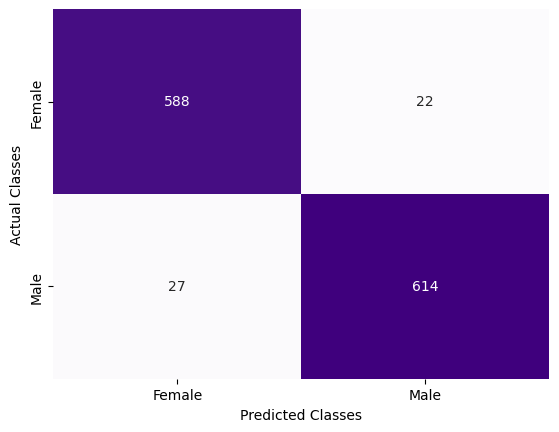

In [67]:
sns.heatmap(confusion_matrix, cmap='Purples', annot=True, cbar=False, fmt='d')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.xticks(np.arange(2) + 0.5, ["Female", "Male"])
plt.yticks(np.arange(2) + 0.5, ["Female", "Male"])